In [34]:
  %%html

<div style= "font-family: Times New Roman; font-weight:bold; letter-spacing: 0px; color:black; font-size:270%;padding:25.0px; background: orange; border-bottom: 8px solid #004466" >2024 Lok Sabha Election Result Analysis<br> <div>

In [35]:
#Importing the necessary libraries

In [36]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [37]:
#Creating a dataframe
df = pd.read_csv('election_results_2024.csv')

In [38]:
df.head()

,Constituency,Const. No.,Leading Candidate,Leading Party,Trailing Candidate,Trailing Party,Margin,Status
0,AJMER,13,BHAGIRATH CHOUDHARY,Bharatiya Janata Party,RAMCHANDRA CHOUDHARY,Indian National Congress,329991,Result Declared
1,ALWAR,8,BHUPENDER YADAV,Bharatiya Janata Party,LALIT YADAV,Indian National Congress,48282,Result Declared
2,AMBALA,1,VARUN CHAUDHRY,Indian National Congress,BANTO KATARIA,Bharatiya Janata Party,49036,Result Declared
3,ANANTNAG-RAJOURI,3,MIAN ALTAF AHMAD,Jammu & Kashmir National Conference,MEHBOOBA MUFTI,Jammu & Kashmir Peoples Democratic Party,281794,Result Declared
4,ARAKKONAM,7,S JAGATHRATCHAKAN,Dravida Munnetra Kazhagam,L VIJAYAN,All India Anna Dravida Munnetra Kazhagam,306559,Result Declared


In [39]:
#Getting Statistics for the Margins
summary_stats = df.describe()
print(summary_stats)

       Const. No.
count  543.000000
mean    18.178637
std     16.427840
min      1.000000
25%      6.000000
50%     14.000000
75%     25.000000
max     80.000000


In [40]:
#Visualizing the distribution of the Victory Margins

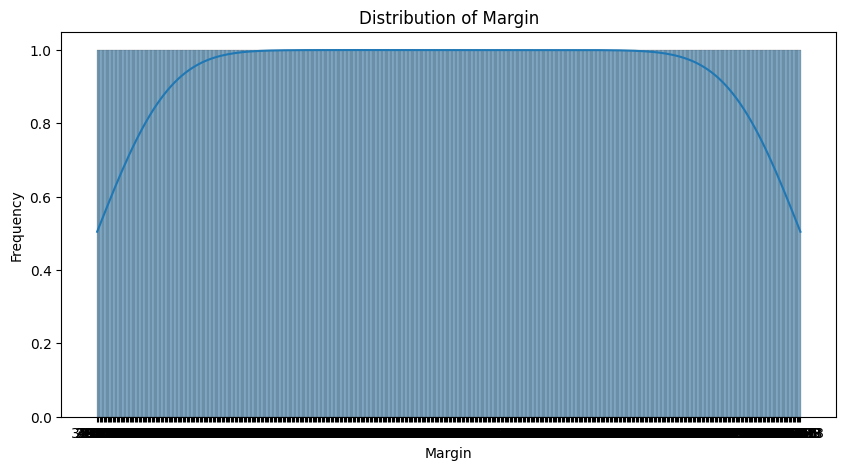

In [41]:
plt.figure(figsize=(10, 5))
sns.histplot(df['Margin'], bins=30, kde=True)
plt.title('Distribution of Margin')
plt.xlabel('Margin')
plt.ylabel('Frequency')
plt.show()

In [42]:
#Counting the number of constituencies won by each party.

In [43]:
party_wins = df['Leading Party'].value_counts()
print(party_wins)

Leading Party
Bharatiya Janata Party                                      240
Indian National Congress                                     99
Samajwadi Party                                              37
All India Trinamool Congress                                 29
Dravida Munnetra Kazhagam                                    22
Telugu Desam                                                 16
Janata Dal (United)                                          12
Shiv Sena (Uddhav Balasaheb Thackrey)                         9
Nationalist Congress Party – Sharadchandra Pawar              8
Shiv Sena                                                     7
Independent                                                   7
Lok Janshakti Party(Ram Vilas)                                5
Communist Party of India (Marxist)                            4
Yuvajana Sramika Rythu Congress Party                         4
Rashtriya Janata Dal                                          4
Indian Union Muslim League

In [44]:
#Margin comparison across different Political parties

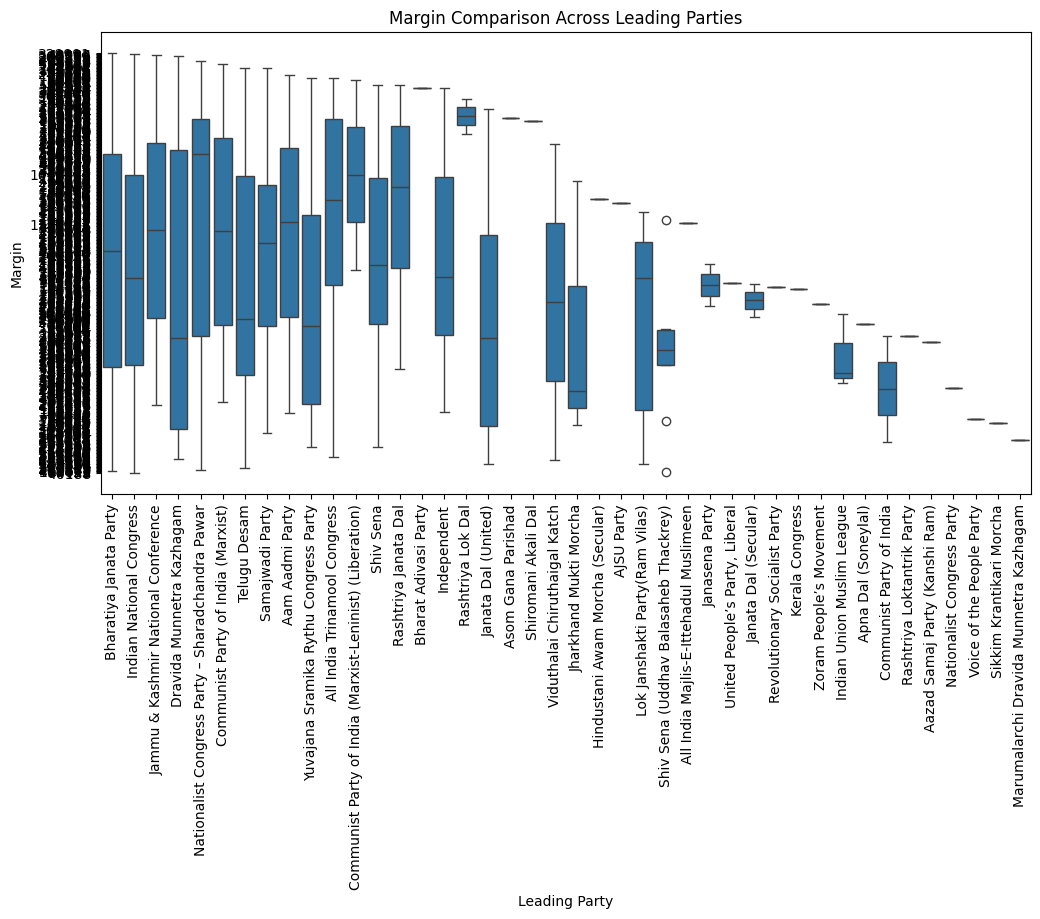

In [45]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Leading Party', y='Margin', data=df)
plt.title('Margin Comparison Across Leading Parties')
plt.xticks(rotation=90)
plt.show()

In [46]:
#Distribution of Leading Parties

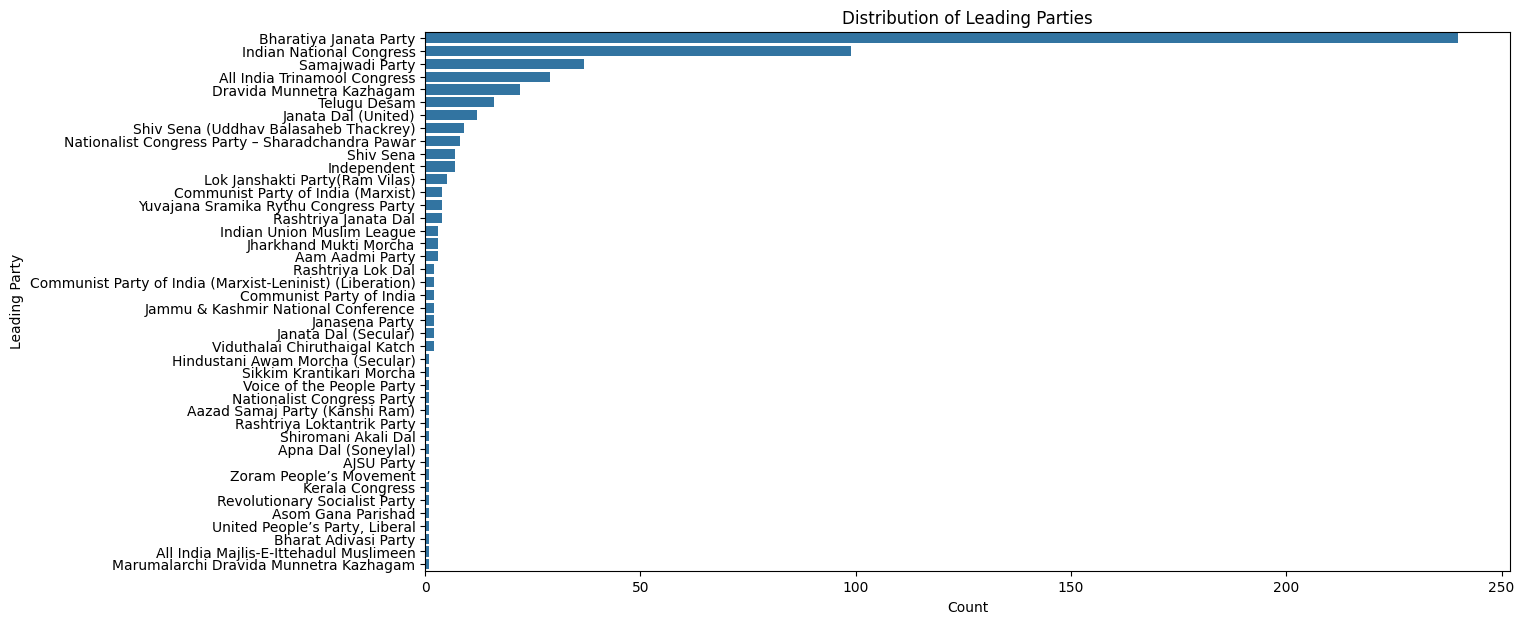

In [47]:
plt.figure(figsize=(14, 7))
sns.countplot(y='Leading Party', data=df, order=df['Leading Party'].value_counts().index)
plt.title('Distribution of Leading Parties')
plt.xlabel('Count')
plt.ylabel('Leading Party')
plt.show()

In [48]:
#Distribution of Trailing Parties

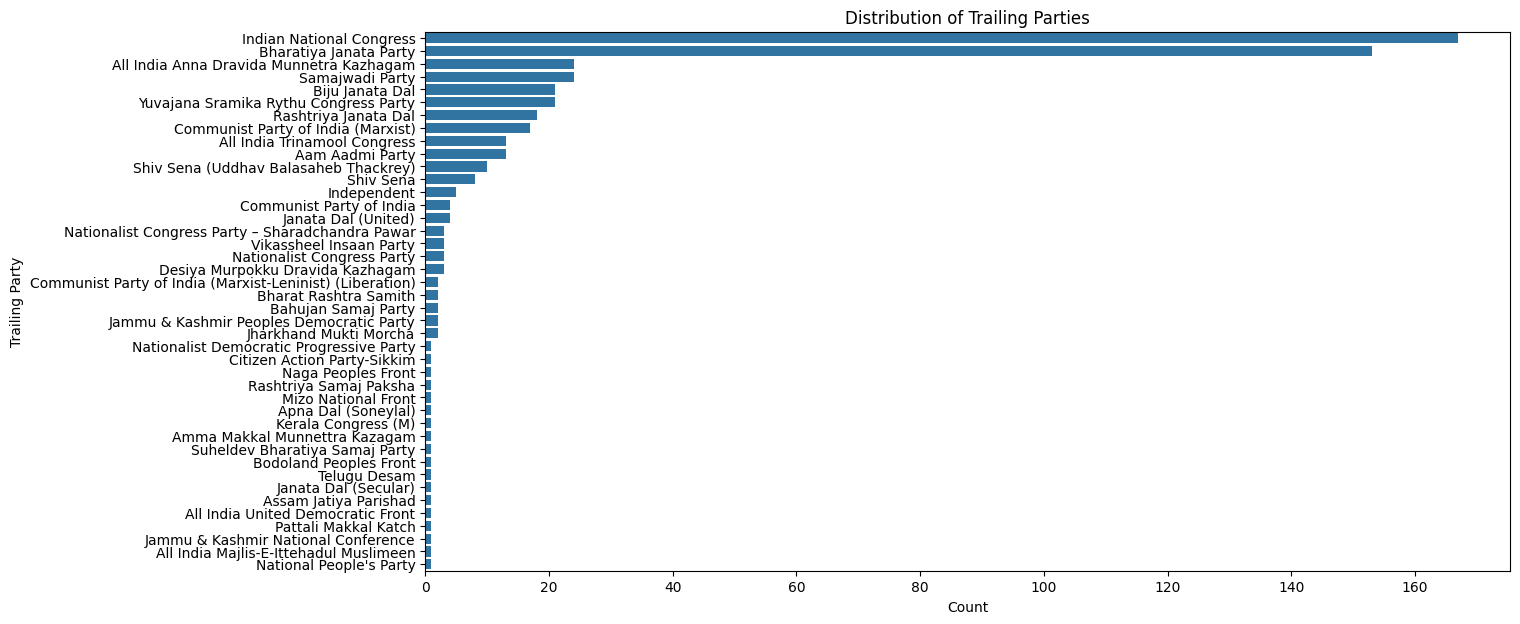

In [49]:
plt.figure(figsize=(14, 7))
sns.countplot(y='Trailing Party', data=df, order=df['Trailing Party'].value_counts().index)
plt.title('Distribution of Trailing Parties')
plt.xlabel('Count')
plt.ylabel('Trailing Party')
plt.show()

In [50]:
# Top N Constituencies with the Largest Victory margin

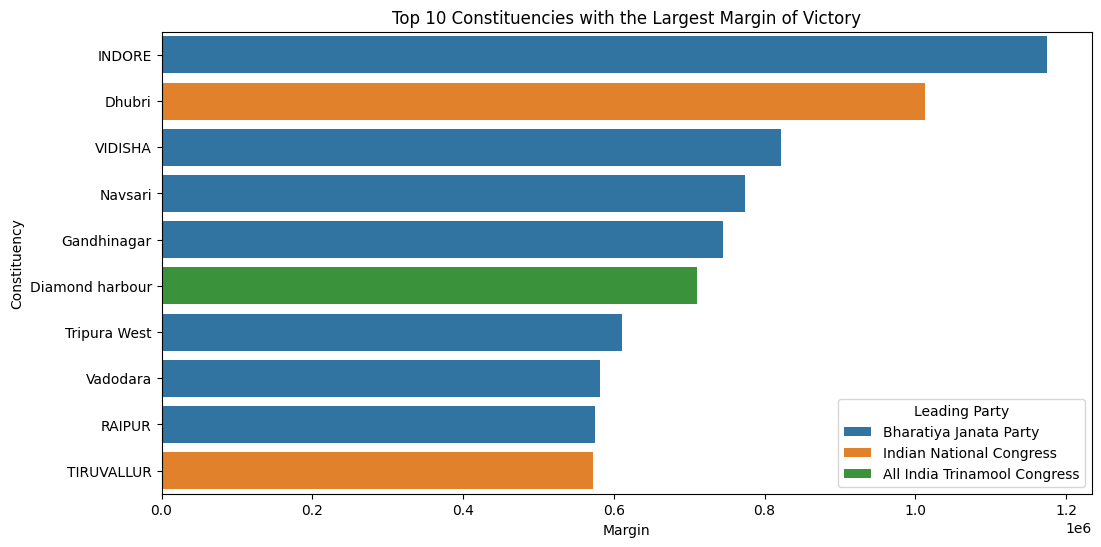

In [51]:
def plot_top_n_margins(df, n=10):
    df['Margin'] = df['Margin'].replace('-', '0')
    df['Margin'] = df['Margin'].str.replace(',', '').astype(int)
    top_n_margin = df.nlargest(n, 'Margin')


    plt.figure(figsize=(12, 6))
    sns.barplot(x='Margin', y='Constituency', data=top_n_margin, hue='Leading Party')
    plt.title(f'Top {n} Constituencies with the Largest Margin of Victory')
    plt.xlabel('Margin')
    plt.ylabel('Constituency')
    plt.legend(title='Leading Party')
    plt.show()

plot_top_n_margins(df, n=10)


In [52]:
# Top N Candidates with the Largest Victory Margin

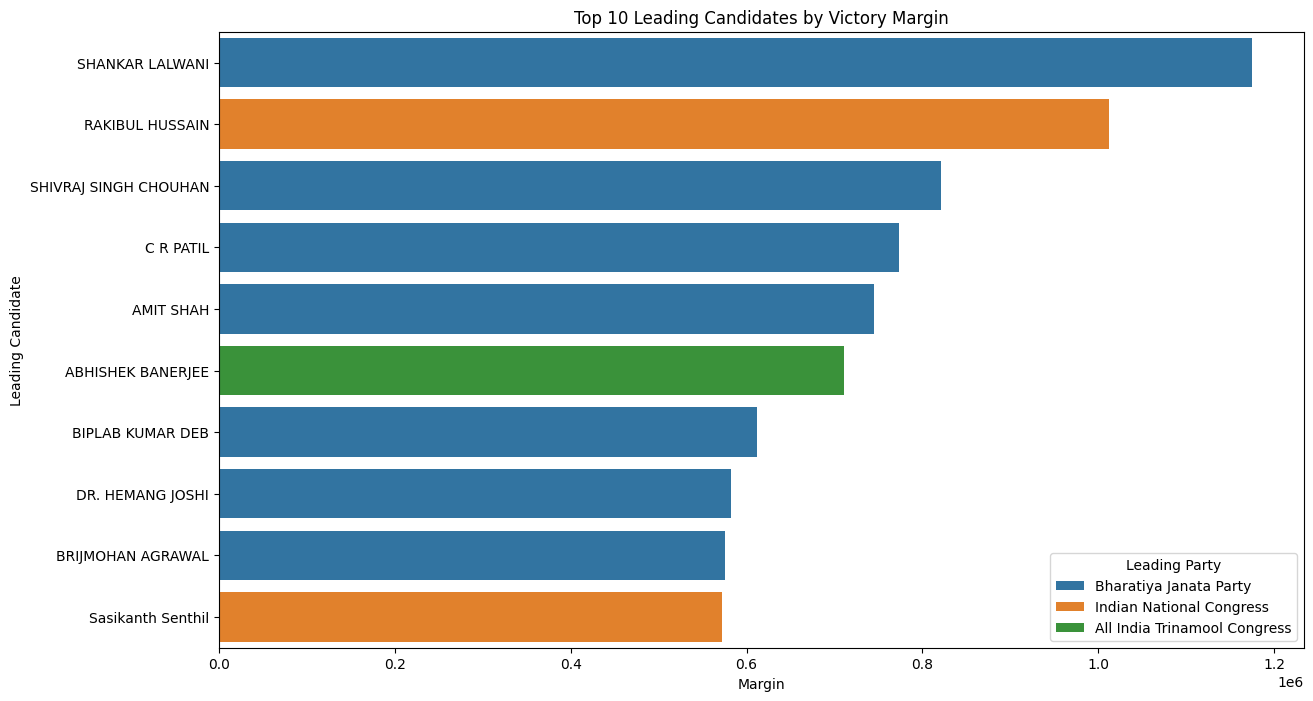

In [53]:
def top_n_leading_candidates(df, n=10):
    top_n_candidates = df.nlargest(n, 'Margin')

    plt.figure(figsize=(14, 8))
    sns.barplot(x='Margin', y='Leading Candidate', data=top_n_candidates, hue='Leading Party')
    plt.title(f'Top {n} Leading Candidates by Victory Margin')
    plt.xlabel('Margin')
    plt.ylabel('Leading Candidate')
    plt.legend(title='Leading Party')
    plt.show()

top_n_leading_candidates(df, n=10)


In [54]:
# Top N Trailing Candidates

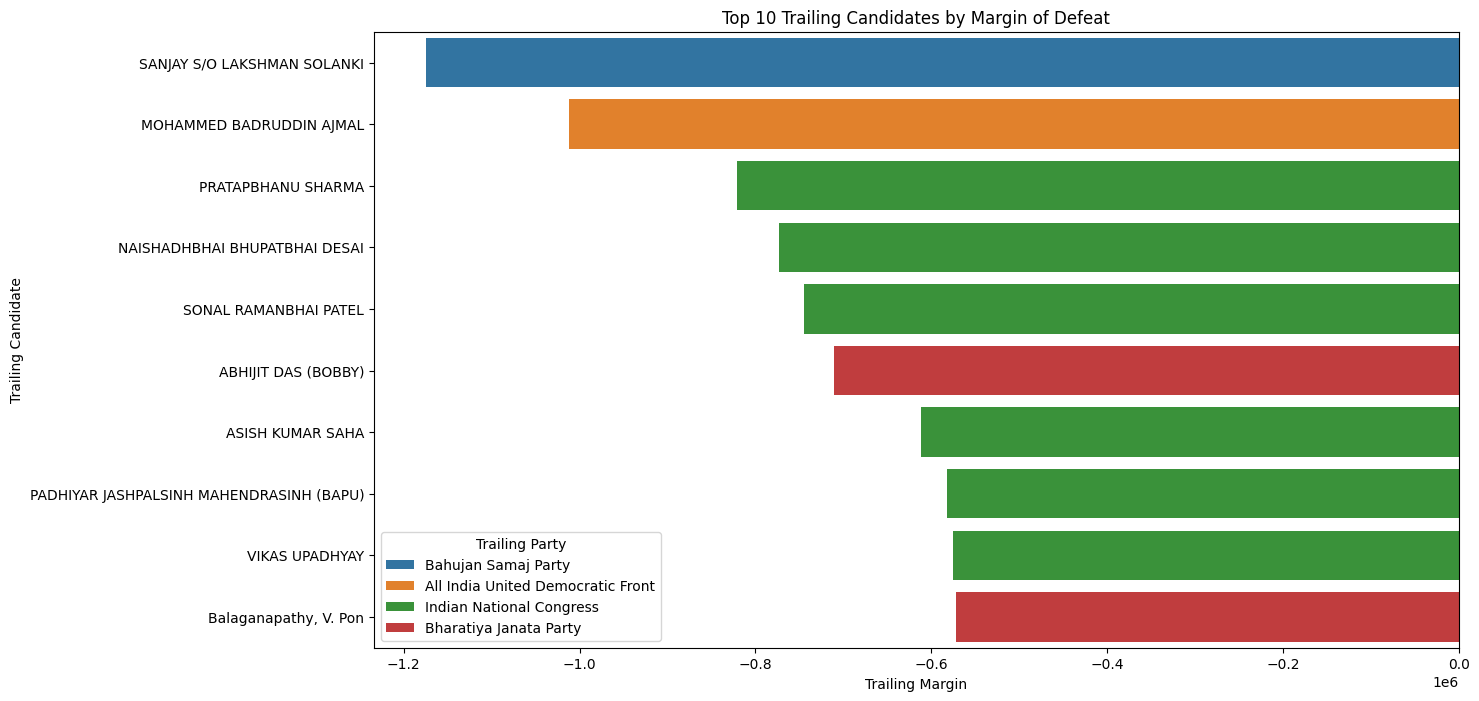

In [55]:
def top_n_trailing_candidates(df, n=10):
    trailing_margin = df.copy()
    trailing_margin['Trailing Margin'] = trailing_margin['Margin'] * -1
    top_n_candidates = trailing_margin.nsmallest(n, 'Trailing Margin')

    plt.figure(figsize=(14, 8))
    sns.barplot(x='Trailing Margin', y='Trailing Candidate', data=top_n_candidates, hue='Trailing Party')
    plt.title(f'Top {n} Trailing Candidates by Margin of Defeat')
    plt.xlabel('Trailing Margin')
    plt.ylabel('Trailing Candidate')
    plt.legend(title='Trailing Party')
    plt.show()

top_n_trailing_candidates(df, n=10)

In [56]:
#Number of seats won by each Party - A visual

<ipython-input-57-d4ad83c785c1>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=seats_won.index, y=seats_won.values, palette='viridis')


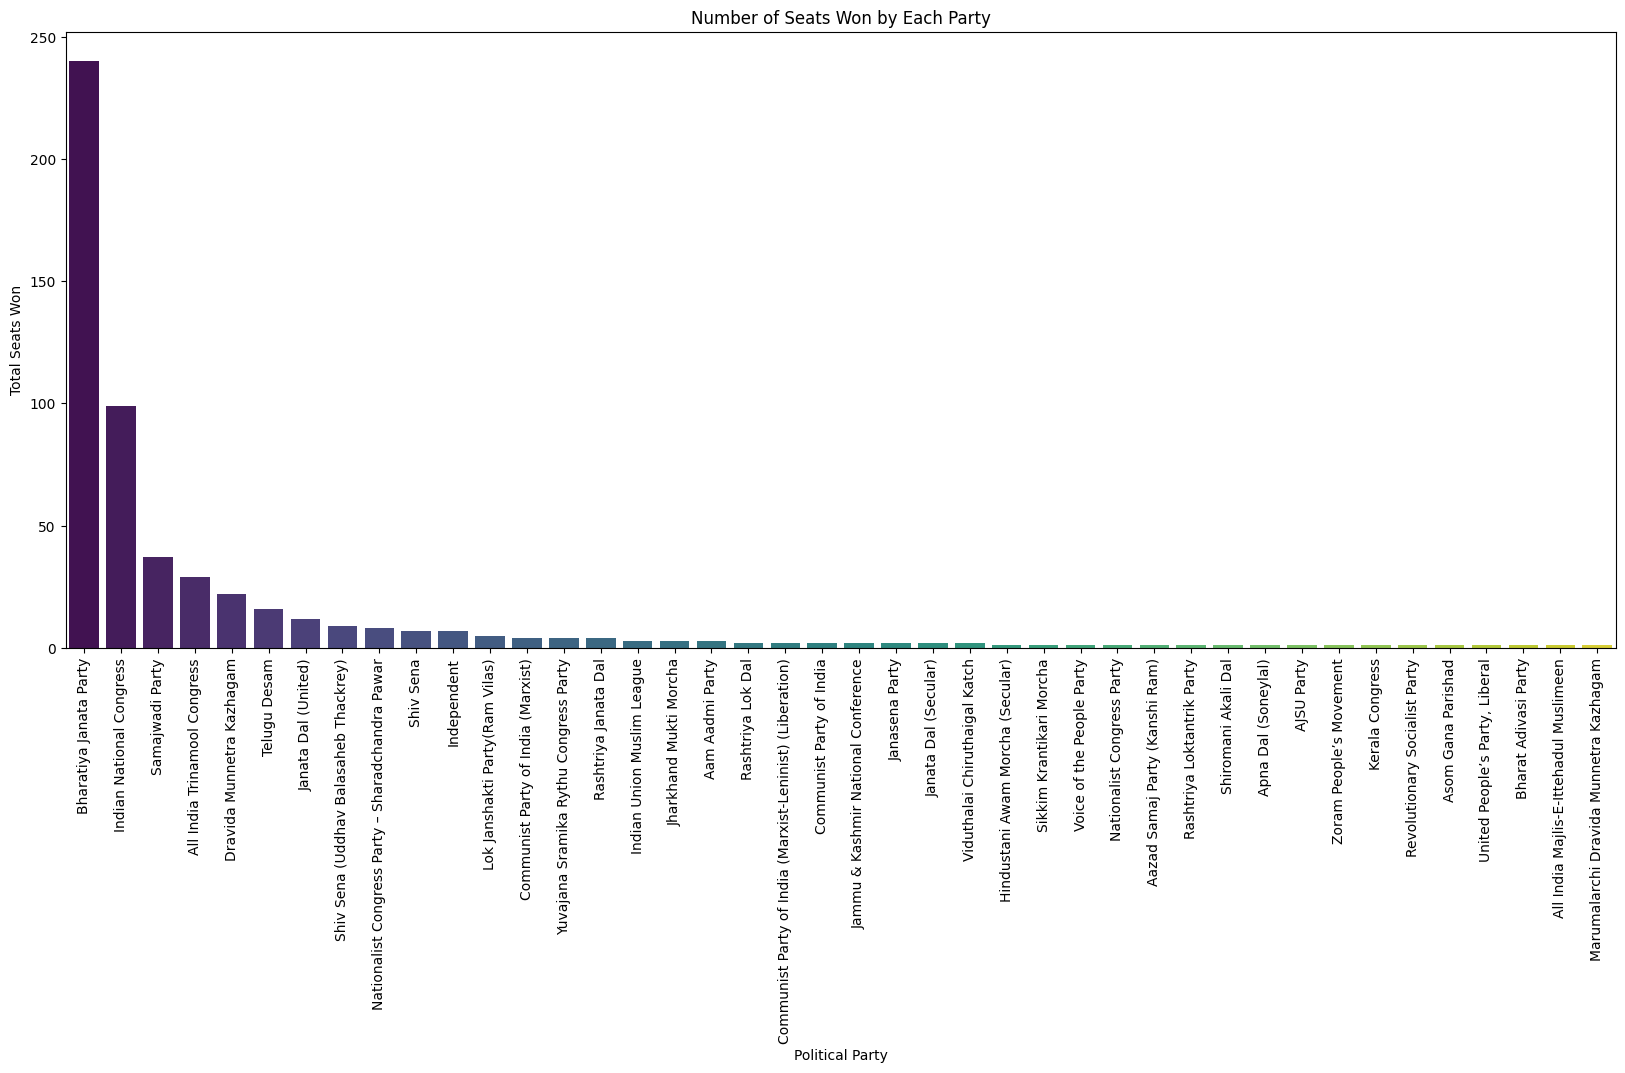

In [57]:
party_votes = df.groupby('Leading Party')['Margin'].sum().sort_values(ascending=False)
leading_party_highest_votes = party_votes.idxmax()
leading_party_lowest_votes = party_votes.idxmin()
seats_won = df['Leading Party'].value_counts()

plt.figure(figsize=(20, 8))
sns.barplot(x=seats_won.index, y=seats_won.values, palette='viridis')
plt.title('Number of Seats Won by Each Party')
plt.xlabel('Political Party')
plt.ylabel('Total Seats Won')
plt.xticks(rotation=90)
plt.show()

In [58]:
#Boxplot for the victory margin by each political party

<ipython-input-59-f22b9007cd02>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Leading Party', y='Margin', palette='muted')


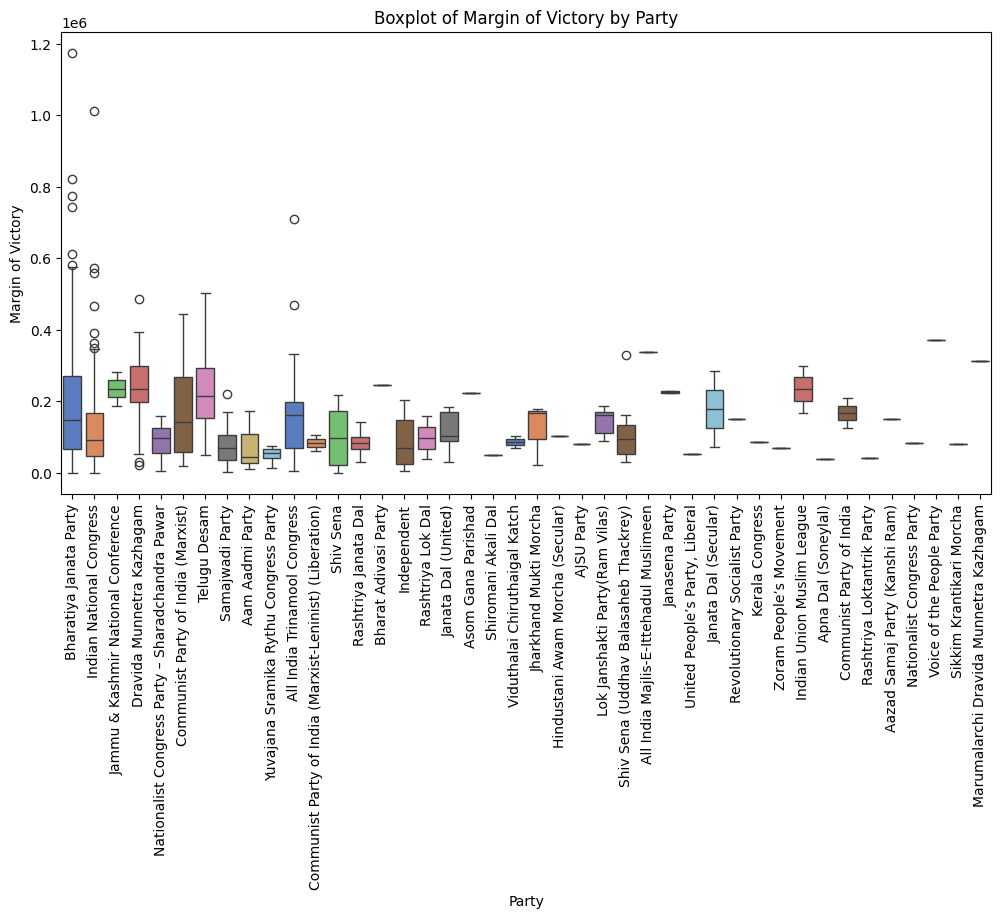

In [59]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='Leading Party', y='Margin', palette='muted')
plt.title('Boxplot of Margin of Victory by Party')
plt.xlabel('Party')
plt.ylabel('Margin of Victory')
plt.xticks(rotation=90)
plt.show()

<ipython-input-60-d3954c9e03a7>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=trailing_party_seats.index[:10], y=trailing_party_seats.values[:10], palette='viridis')


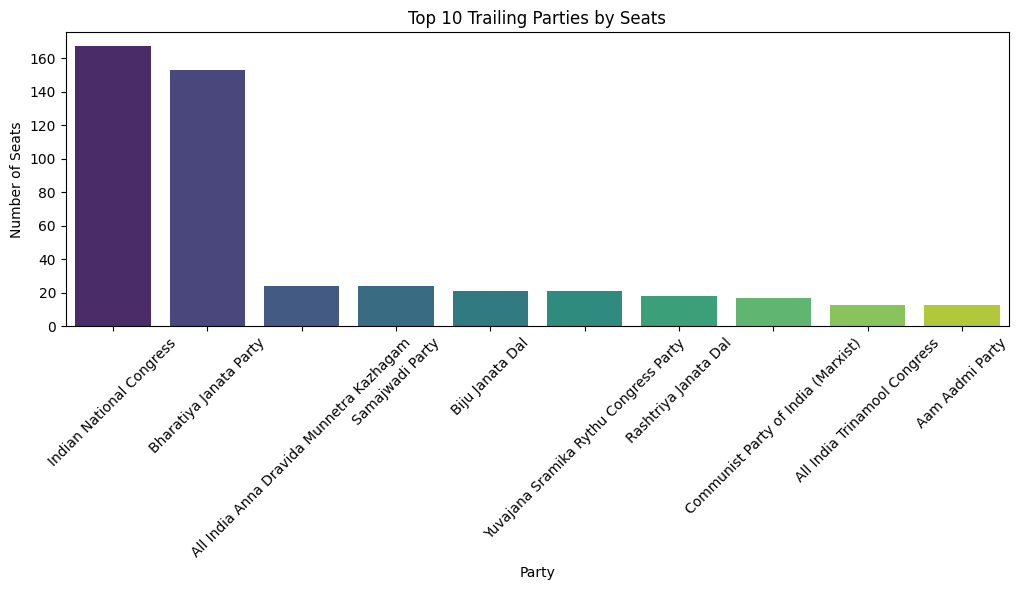

In [60]:

trailing_party_seats = df['Trailing Party'].value_counts()
plt.figure(figsize=(20, 6))
plt.subplot(1, 2, 2)
sns.barplot(x=trailing_party_seats.index[:10], y=trailing_party_seats.values[:10], palette='viridis')
plt.title('Top 10 Trailing Parties by Seats')
plt.xlabel('Party')
plt.ylabel('Number of Seats')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

In [61]:
# Performing Predictive Analytics on the Vote Margins

In [62]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder

# Encode categorical variables
le = LabelEncoder()
df['Leading Party'] = le.fit_transform(df['Leading Party'])
df['Trailing Party'] = le.fit_transform(df['Trailing Party'])
df['Status'] = le.fit_transform(df['Status'])

# Define features and target
X = df[['Const. No.', 'Leading Party', 'Trailing Party']]
y = df['Margin']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train the model
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

In [63]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'MAE: {mae}, MSE: {mse}, R2: {r2}')

MAE: 92848.61753721212, MSE: 17219937237.889446, R2: 0.03262569165278395


In [64]:
# Performing clustering to group constituencies with similar characteristics

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


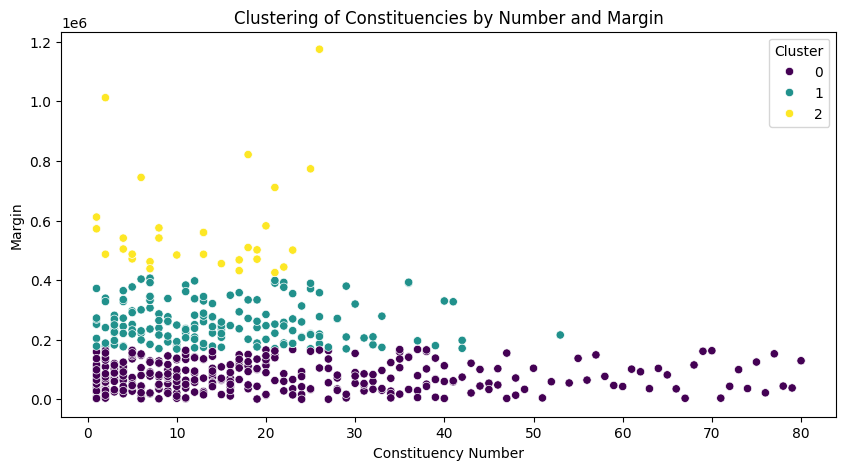

In [65]:
from sklearn.cluster import KMeans

# Define features for clustering
X = df[['Const. No.', 'Margin']]

# Apply KMeans clustering
kmeans = KMeans(n_clusters=3, random_state=42)
df['Cluster'] = kmeans.fit_predict(X)

# Visualization
plt.figure(figsize=(10, 5))
sns.scatterplot(data=df, x='Const. No.', y='Margin', hue='Cluster', palette='viridis')
plt.title('Clustering of Constituencies by Number and Margin')
plt.xlabel('Constituency Number')
plt.ylabel('Margin')
plt.show()


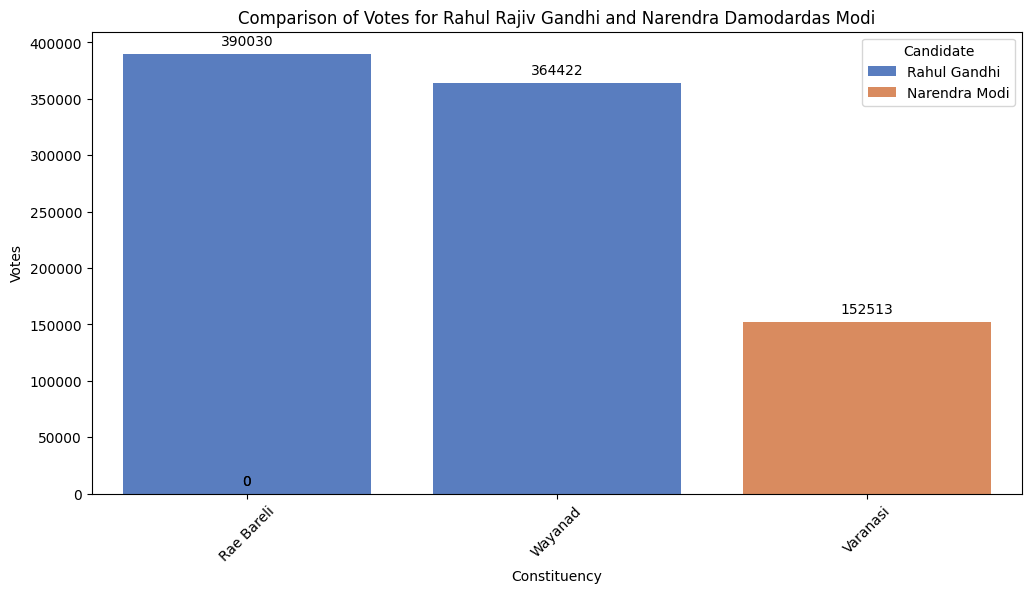

In [67]:
rahul_entries = df[df['Leading Candidate'] == 'RAHUL GANDHI']
modi_entries = df[df['Leading Candidate'] == 'NARENDRA MODI']

rahul_votes = rahul_entries['Margin'].values
modi_votes = modi_entries['Margin'].values[0] if not modi_entries.empty else 0

rahul_const = list(rahul_entries['Constituency'])

modi_const = modi_entries['Constituency'].values[0] if not modi_entries.empty else "Modi Constituency"

data_to_plot = pd.DataFrame({
    'Candidate': ['Rahul Gandhi'] * len(rahul_votes) + ['Narendra Modi'],
    'Constituency': rahul_const + [modi_const],
    'Votes': list(rahul_votes) + [modi_votes]
})

plt.figure(figsize=(12, 6))
ax = sns.barplot(data=data_to_plot, x='Constituency', y='Votes', hue='Candidate', palette='muted')

# Adding vote annotations
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                xytext=(0, 9),
                textcoords='offset points')

plt.title('Comparison of Votes for Rahul Rajiv Gandhi and Narendra Damodardas Modi')
plt.xlabel('Constituency')
plt.ylabel('Votes')
plt.xticks(rotation=45)
plt.legend(title='Candidate')
plt.show()